In [1]:
# ⭐ STEP 1 — Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Create a random seed for reproducibility
np.random.seed(42)

# Example store list
store_ids = range(1, 501)  # 500 Starbucks stores

# Simulate store locations
cities = ['Seattle','New York','London','Shanghai','Tokyo','Paris','Sydney']
locations = np.random.choice(cities, len(store_ids))

# Simulate annual sales between $0.8M and $5M per store
annual_sales = np.round(np.random.uniform(0.8, 5.0, len(store_ids)), 2)

# Simulate profit margin between 5% and 25% per store
profit_margin = np.round(np.random.uniform(5, 25, len(store_ids)), 1)

# Demographics: average age and income for store catchment
avg_age = np.round(np.random.uniform(25, 60, len(store_ids)), 1)
median_income = np.random.randint(30000, 120000, len(store_ids))

# Build pandas DataFrame
df = pd.DataFrame({
    'Store_ID': store_ids,
    'Location': locations,
    'Annual_Sales_Million': annual_sales,
    'Profit_Margin_pct': profit_margin,
    'Avg_Customer_Age': avg_age,
    'Median_Household_Income': median_income
})

df.head()

,Store_ID,Location,Annual_Sales_Million,Profit_Margin_pct,Avg_Customer_Age,Median_Household_Income
0,1,Sydney,2.07,7.0,32.0,52614
1,2,Shanghai,3.06,10.1,49.3,71991
2,3,Tokyo,2.17,19.5,53.8,100476
3,4,Sydney,4.28,16.9,26.4,90920
4,5,London,1.94,7.0,48.5,93530


In [3]:
# Basic summary statistics
df.describe()

,Store_ID,Annual_Sales_Million,Profit_Margin_pct,Avg_Customer_Age,Median_Household_Income
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,2.931360,15.203800,42.307200,72369.542000
std,144.481833,1.180281,5.929158,9.518462,26071.779222
min,1.000000,0.810000,5.000000,25.000000,30162.000000
25%,125.750000,1.927500,10.100000,33.900000,48996.750000
50%,250.500000,3.025000,15.400000,42.700000,71083.500000
75%,375.250000,3.900000,20.425000,49.400000,94219.250000
max,500.000000,4.990000,25.000000,59.800000,119822.000000


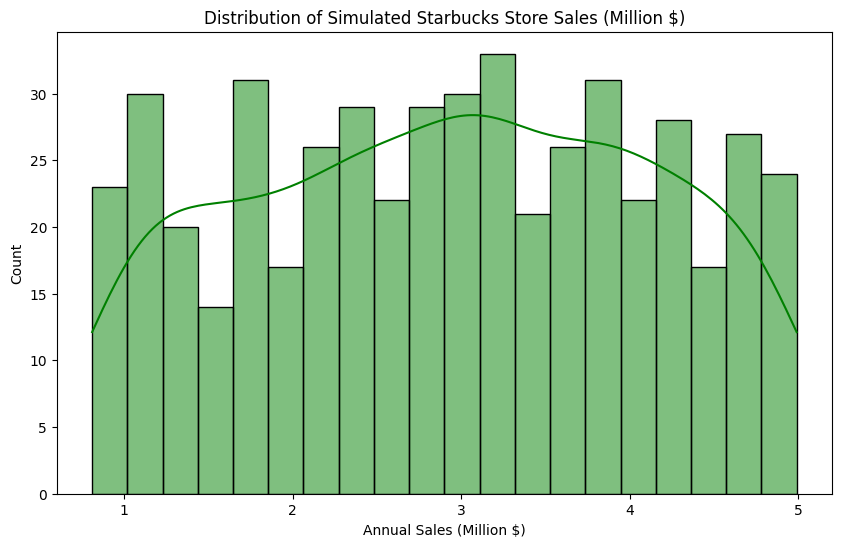

In [4]:
plt.figure(figsize=(10,6))
sns.histplot(df['Annual_Sales_Million'], bins=20, kde=True, color='green')
plt.title('Distribution of Simulated Starbucks Store Sales (Million $)')
plt.xlabel('Annual Sales (Million $)')
plt.show()


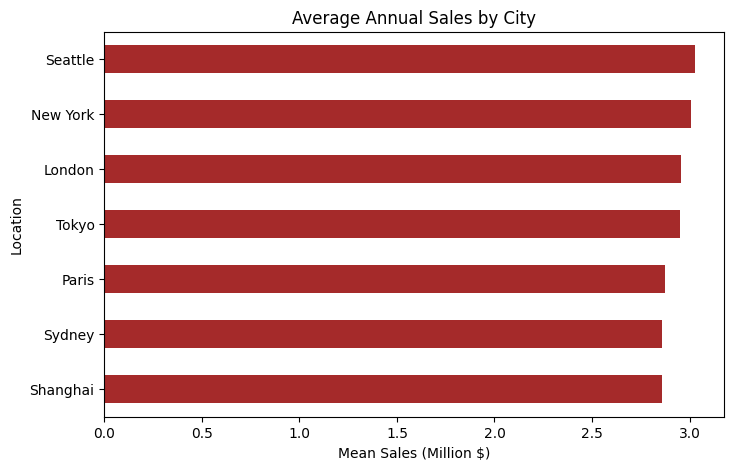

In [5]:
# Average sales by city
sales_by_location = df.groupby('Location')['Annual_Sales_Million'].mean().sort_values()

plt.figure(figsize=(8,5))
sales_by_location.plot(kind='barh', color='brown')
plt.title('Average Annual Sales by City')
plt.xlabel('Mean Sales (Million $)')
plt.show()

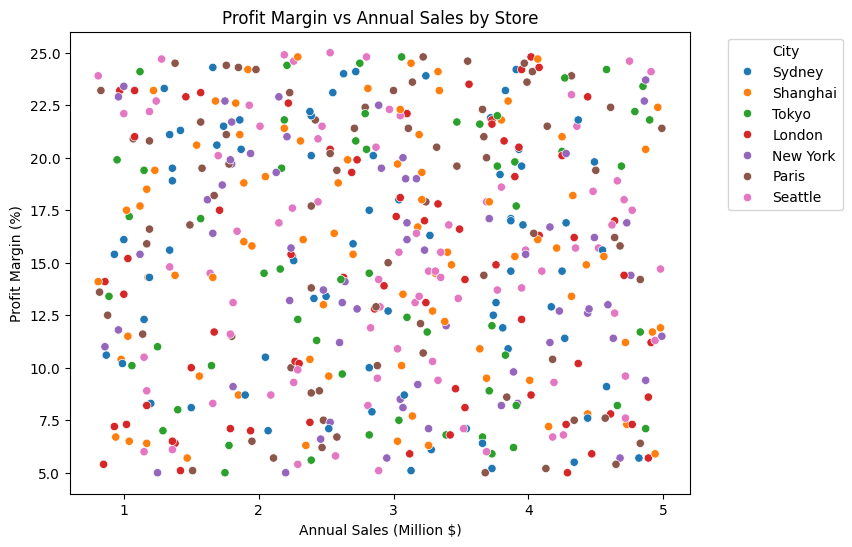

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual_Sales_Million', 
    y='Profit_Margin_pct', 
    hue='Location', 
    data=df
)
plt.title('Profit Margin vs Annual Sales by Store')
plt.xlabel('Annual Sales (Million $)')
plt.ylabel('Profit Margin (%)')
plt.legend(title='City', bbox_to_anchor=(1.05,1))
plt.show()

In [7]:
# Correlation of demographics with sales
corr = df[['Annual_Sales_Million','Avg_Customer_Age','Median_Household_Income']].corr()
corr

,Annual_Sales_Million,Avg_Customer_Age,Median_Household_Income
Annual_Sales_Million,1.000000,-0.031852,-0.019308
Avg_Customer_Age,-0.031852,1.000000,-0.005737
Median_Household_Income,-0.019308,-0.005737,1.000000
